# Data Analysis:

Dataset contains 20677 data points and around 106 features. I cleaned dataset by treating null values and removing some unwanted columns. I did analysis on the basis of features like room type, neighbourhood, accomodates etc. Also created one new feature Price per person per night and drew inferences by plotting plots. I converted "Name" column by converting them from words to token which we may use in future for doing text analysis.

Also converted categorical variables in numerical for by using pandas get dummies function. I made dataset clean and ready for building model for predicting prices on the basis of features. I built two regression models; random forest model and XGBoost and compared them on the basis of metrics and found XGboost gave better results than random forest.

In [95]:
# Importing essential Libraries
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download(['punkt', 'wordnet','stopwords'])
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error,r2_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/anujsheth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anujsheth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anujsheth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing listings csv
listings = pd.read_csv("listings.csv")

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


In [4]:
listings.shape

(20677, 106)

In [5]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [6]:
list(listings.dtypes)

[dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'

In [7]:
#Columns with missing values
listings.isna().sum().sort_values(ascending=False)

neighbourhood_group_cleansed    20677
thumbnail_url                   20677
host_acceptance_rate            20677
medium_url                      20677
xl_picture_url                  20677
                                ...  
minimum_nights                      0
maximum_nights                      0
minimum_minimum_nights              0
maximum_minimum_nights              0
id                                  0
Length: 106, dtype: int64

In [8]:
#Distribution of listings type
listings.groupby('room_type').count()['id']

room_type
Entire home/apt    16402
Private room        4194
Shared room           81
Name: id, dtype: int64

In [9]:
#The number of listings in each neighbourhood
listings.groupby('neighbourhood_cleansed').count()['id'].sort_values(ascending = False)

neighbourhood_cleansed
De Baarsjes - Oud-West                    3549
De Pijp - Rivierenbuurt                   2560
Centrum-West                              2328
Centrum-Oost                              1797
Westerpark                                1530
Zuid                                      1464
Oud-Oost                                  1349
Bos en Lommer                             1180
Oostelijk Havengebied - Indische Buurt     985
Oud-Noord                                  625
Watergraafsmeer                            591
IJburg - Zeeburgereiland                   491
Slotervaart                                404
Noord-West                                 375
Noord-Oost                                 285
Buitenveldert - Zuidas                     260
Geuzenveld - Slotermeer                    226
De Aker - Nieuw Sloten                     154
Osdorp                                     152
Gaasperdam - Driemond                      141
Bijlmer-Centrum                      

In [10]:
#The distribution of the apartment size in the listings dataset, measured by the number of people that can be accommodated
listings.groupby(['accommodates'])['id'].count()

accommodates
1       486
2     11195
3      1666
4      6331
5       389
6       411
7        49
8        80
9         8
10       12
11        3
12       11
14        3
16       30
17        1
18        1
30        1
Name: id, dtype: int64

# Calculating Prices Per Person Per Night

In [11]:
#The columns needed for obtaining prices per person per night
listings[['price', 'accommodates', 'guests_included', 'extra_people']].head()

,price,accommodates,guests_included,extra_people
0,$59.00,2,1,$20.00
1,$80.00,2,2,$0.00
2,$125.00,3,2,$10.00
3,$150.00,2,1,$0.00
4,$75.00,2,1,$0.00


In [12]:
#The columns needed for calculation do not have any missing values
listings[['price', 'accommodates', 'guests_included', 'extra_people']].head().isna().sum()

price              0
accommodates       0
guests_included    0
extra_people       0
dtype: int64

In [13]:
#Convert the prices to numerical variable
format_price = listings['price'].str.replace("$","").str.replace(',','').astype(float)

In [14]:
# Number of people that can be accommodated but are not included in the price
extra_space = (listings['accommodates'] - listings['guests_included'])
#Due to inconsistencies in the imported data this number is negative in some rare cases. Floor it to 0.
extra_space = extra_space.apply(lambda x: 0 if x<0 else x)
#Calculate the extra costs
extra_price = extra_space*listings['extra_people'].str.replace("$","").str.replace(',','').astype(float)

In [15]:
#Obtain the price at full capacity and calculate price per person per night
listings['price_per_person'] = (format_price + extra_price) / listings['accommodates']

In [16]:
listings['price_per_person'].describe()

count    20677.000000
mean        61.203829
std         55.388154
min          0.000000
25%         42.500000
50%         54.500000
75%         70.000000
max       3815.000000
Name: price_per_person, dtype: float64

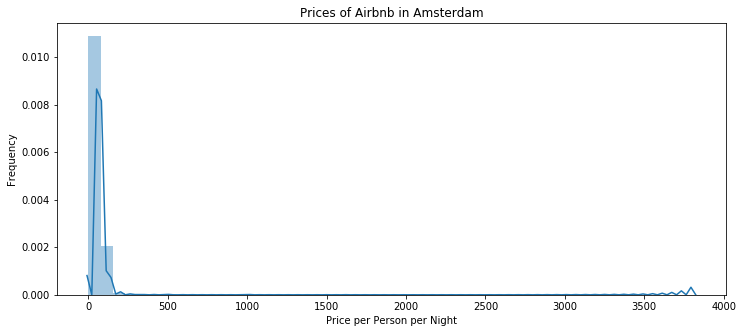

In [17]:
#Distribution of prices
plt.rcParams['figure.figsize'] = [12, 5]
sns.distplot(listings['price_per_person']);
plt.xlabel('Price per Person per Night');
plt.ylabel('Frequency');
plt.title('Prices of Airbnb in Amsterdam');

In [18]:
#Remove outliers using Tukey rule
IQR = listings['price_per_person'].quantile(0.75) - listings['price_per_person'].quantile(0.25)
lower_bound = listings['price_per_person'].quantile(0.25) - 3*IQR
upper_bound = listings['price_per_person'].quantile(0.75) + 3*IQR
lower_bound, upper_bound

(-40.0, 152.5)

In [19]:
#Override lower bound with a positive number 
lower_bound = 10
listings = listings[(listings['price_per_person']>lower_bound) & (listings['price_per_person']<upper_bound)]
listings.shape

(20430, 107)

In [20]:
listings["room_type"]

0           Private room
1           Private room
2        Entire home/apt
3           Private room
4           Private room
              ...       
20672        Shared room
20673    Entire home/apt
20674       Private room
20675    Entire home/apt
20676       Private room
Name: room_type, Length: 20430, dtype: object

In [21]:
listings['price_per_person']

0         39.5
1         40.0
2         45.0
3         75.0
4         37.5
         ...  
20672     23.5
20673     50.0
20674     52.5
20675    109.5
20676     37.5
Name: price_per_person, Length: 20430, dtype: float64

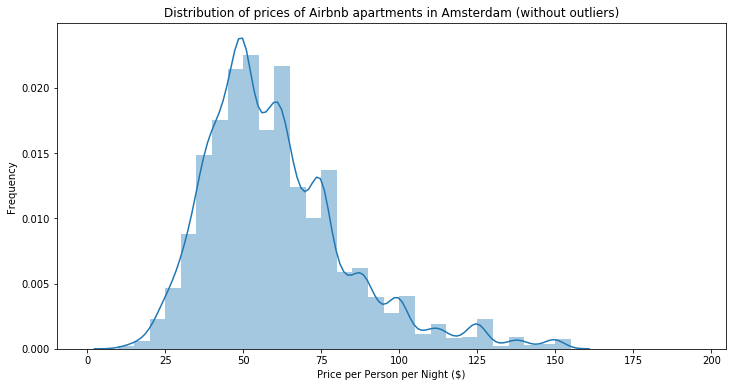

In [22]:
#Distribution of prices after removing outliers
plt.rcParams['figure.figsize'] = [12, 6]   
sns.distplot(listings['price_per_person'][listings["room_type"]=='Entire home/apt'],bins = np.arange(0,200,5));
plt.xlabel('Price per Person per Night ($)');
plt.ylabel('Frequency');
plt.title('Distribution of prices of Airbnb apartments in Amsterdam (without outliers)');
#plt.savefig('Price Distribution')

In [23]:
listings['price_per_person'].describe()

count    20430.000000
mean        58.207122
std         22.782481
min         11.666667
25%         42.500000
50%         54.000000
75%         70.000000
max        151.500000
Name: price_per_person, dtype: float64

In [24]:
listings['name']

0                 Quiet Garden View Room & Super Fast WiFi
1             Studio with private bathroom in the centre 1
2          Lovely apt in City Centre (w.lift) near Jordaan
3        Romantic, stylish B&B houseboat in canal district
4                                  Comfortable double room
                               ...                        
20672             Clean and neat appartment Amsterdam West
20673                       Family house with large garden
20674    Bedroom in newly renovated apartment at the Zu...
20675                                     Amsterdam Secret
20676                                        Amstel studio
Name: name, Length: 20430, dtype: object

In [25]:
#Fill the missing names in the listings dataset
listings['name'].fillna('Unknown', inplace = True)

In [26]:
# defining function for creating plots with adding different filters for different columns
def price_neighborhood(df, filters = None):
    
    #Empty Filter
    bools = [True]*df.shape[0]
    
    #Combine all the filters
    if filters:
        for column, value in filters.items():
            additional_filter = (df[column].isin(value))
            bools = bools & additional_filter

    #Apply the filters
    df_filtered = df[bools]
        
    #Calculate average prices in different neighborhoods
    avg_prices = df_filtered.groupby(['neighbourhood_cleansed'])['price_per_person'].mean().sort_values(ascending = False)
    
    #Store them in a dataframe
    avg_prices_df = pd.DataFrame(avg_prices).reset_index()

    #Visualize the results
    colors = sns.color_palette('pastel')
    sns.barplot(y = 'neighbourhood_cleansed', x = 'price_per_person', data = df_filtered, 
                order = avg_prices.index, orient='h', color= colors[1], zorder= 2)
    plt.xlabel('Average Price per Person per Night ($)')
    plt.ylabel('')
    plt.title('Average Prices in Amsterdam Neighborhoods')
    plt.subplots_adjust(left=0.20, right=0.9, top=0.95, bottom=0.07)
    plt.grid(axis = 'x', linestyle = '--', zorder=0)

    return avg_prices_df

In [27]:
#Calculate average prices in different neighborhoods
avg_prices = listings.groupby(['neighbourhood_cleansed'])['price_per_person'].mean().sort_values(ascending = False)

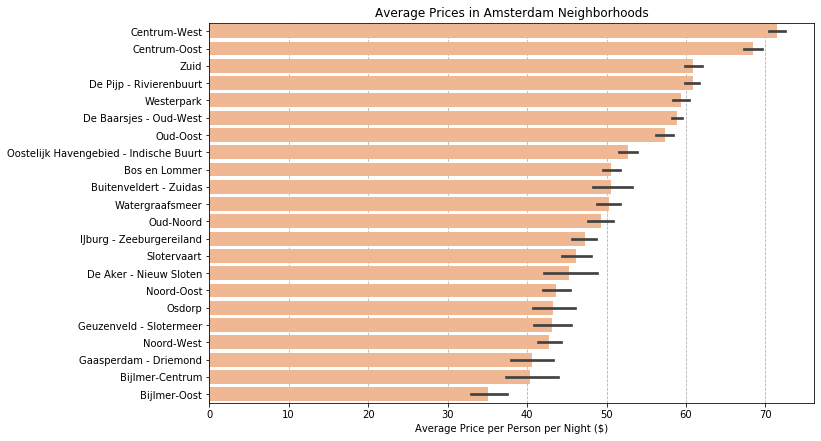

In [28]:
all_avg = price_neighborhood(listings);

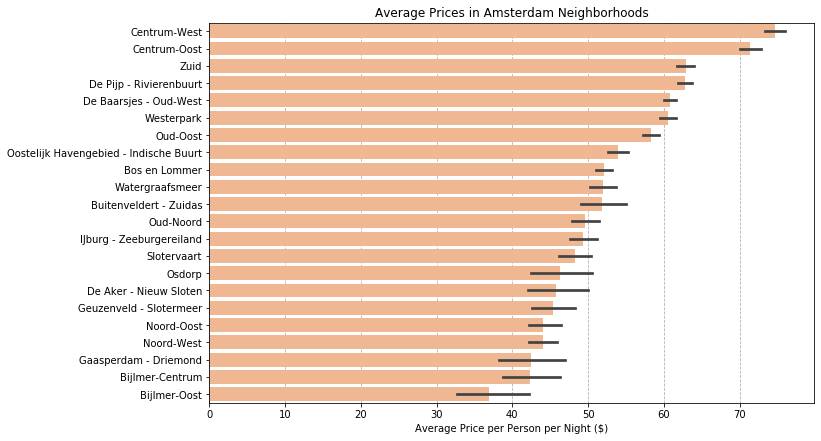

In [29]:
# Average prices for room type  "Entire room/apt"
home_type = price_neighborhood(listings, {'room_type': ['Entire home/apt']});

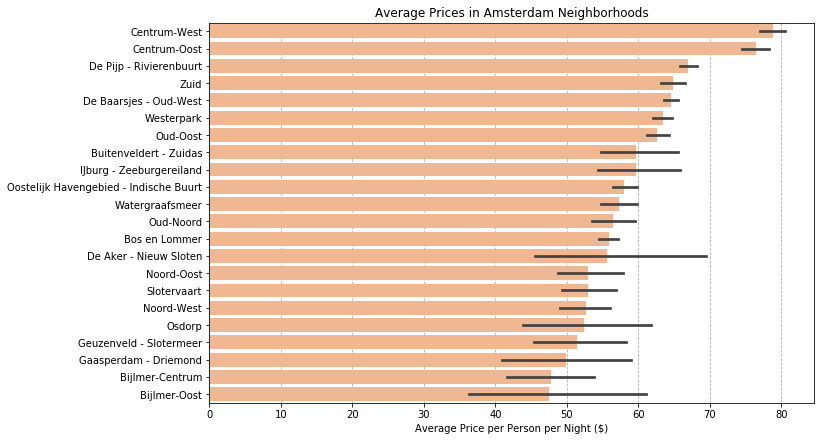

In [30]:
# Average prices for room type  "Entire room/apt" with two accomodates
home_type_accomodates = price_neighborhood(listings, {'room_type': ['Entire home/apt'], 'accommodates':[2]});

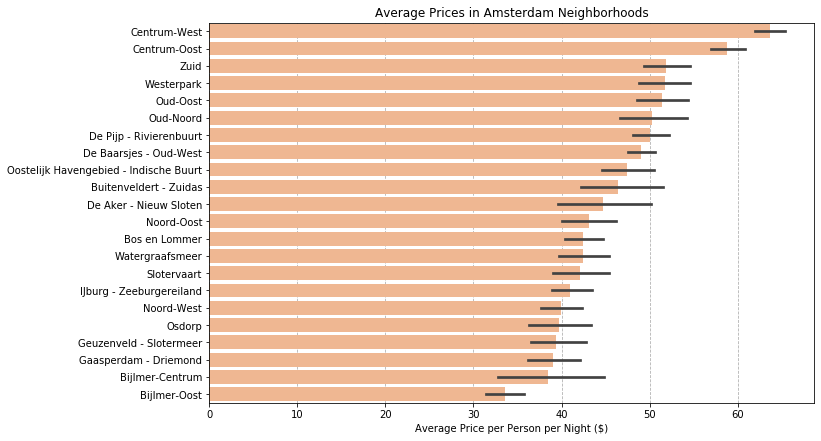

In [31]:
# Average prices for room type  "Private room"
private_room_avg = price_neighborhood(listings, {'room_type': ['Private room']});

In [32]:
# Difference between avg prices for different room type
difference = private_room_avg.merge(home_type, on = 'neighbourhood_cleansed')
difference['price_per_person_x'] - difference['price_per_person_y']

0    -11.108377
1    -12.642490
2    -11.018982
3     -8.762465
4     -6.979239
5      0.576794
6    -12.737909
7    -11.748899
8     -6.577495
9     -5.515756
10    -1.045899
11    -1.015789
12    -9.587465
13    -9.600739
14    -6.177140
15    -8.281956
16    -4.183238
17    -6.624026
18    -5.921307
19    -3.465147
20    -3.838447
21    -3.378022
dtype: float64

In [33]:
# Correlation between them
difference.corr()

,price_per_person_x,price_per_person_y
price_per_person_x,1.000000,0.941302
price_per_person_y,0.941302,1.000000


# Analysis:

Entire homes/apartments only: 

1) The most expensive areas (central) ($ 70 per person per night)
   Centrum West and Oost 

2) The neighborhoods surrounding central areas ($ 60 per person per night)
   Oud-Zuid, De Pijp, De Baarsjes, Westerpark, Oud-Oost

3) Exception (is in central part)
   The Oud-Noord  (priced just below 50 dollars). 

4) The most affordable
   Bijlmer areas 

Private rooms only: 

In almost all neighborhoods, private rooms are around 10 dollars cheaper than entire apartments, however, the prices between two types or listings are obviously strongly positively correlated (0.95).

In [34]:
# Converting listings names to tokens
def tokenize(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())
    tokens = word_tokenize(text)
    
    tokens_subset = [v.strip() for v in tokens if v.strip() not in set(stopwords.words('english'))]
    
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(w) for w in tokens_subset]
    
    return lemmed

In [35]:
#Find the most common tokens in listings names (titles)

count = CountVectorizer(tokenizer = tokenize)
names_wordcount = count.fit_transform(listings['name'])

wordcount_raw = names_wordcount.sum(axis=0)

wordcount_mapped = [(word, wordcount_raw[0, i]) for word, i in count.vocabulary_.items()]

wordcount_df = pd.DataFrame(wordcount_mapped, columns =['word','count']).sort_values(by='count', ascending=False)
wordcount_df[:50]

,word,count
30,apartment,8114
40,amsterdam,4871
128,spacious,2435
14,city,2169
3,room,1987
10,centre,1976
84,house,1752
17,near,1734
68,center,1631
1,garden,1609


(array([73.,  2.,  0., 10.,  1.,  0.,  1.,  4.,  0.,  2.,  4.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  7.]),
 array([    0. ,   817.2,  1634.4,  2451.6,  3268.8,  4086. ,  4903.2,
         5720.4,  6537.6,  7354.8,  8172. ,  8989.2,  9806.4, 10623.6,
        11440.8, 12258. , 13075.2, 13892.4, 14709.6, 15526.8, 16344. ,
        17161.2, 17978.4, 18795.6, 19612.8, 20430. ]),
 <a list of 25 Patch objects>)

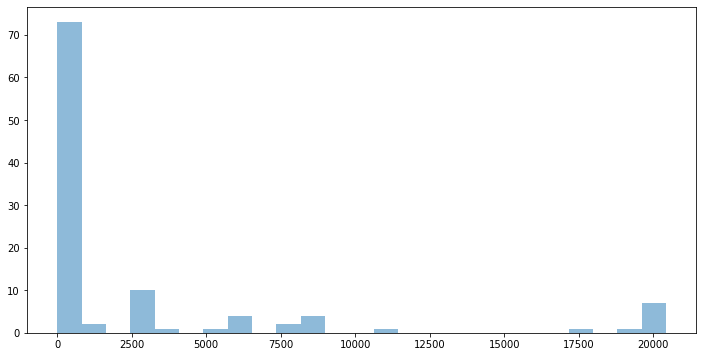

In [36]:
# plotting the histogram for number of columns versus number of null values

missing_cols = listings.isnull().sum()
plt.hist(missing_cols, bins = 25, alpha = 0.5)

In [37]:
missing_15 = [col for col in listings.columns if (listings[col].isnull().sum()/listings.shape[0]) * 100 > 12]
print(len(missing_15))

# deleting the columns which have more than 15% of null values
for cols in missing_15:
    del listings[cols]

32


(array([67.,  3.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  0.  ,  34.76,  69.52, 104.28, 139.04, 173.8 , 208.56, 243.32,
        278.08, 312.84, 347.6 , 382.36, 417.12, 451.88, 486.64, 521.4 ,
        556.16, 590.92, 625.68, 660.44, 695.2 , 729.96, 764.72, 799.48,
        834.24, 869.  ]),
 <a list of 25 Patch objects>)

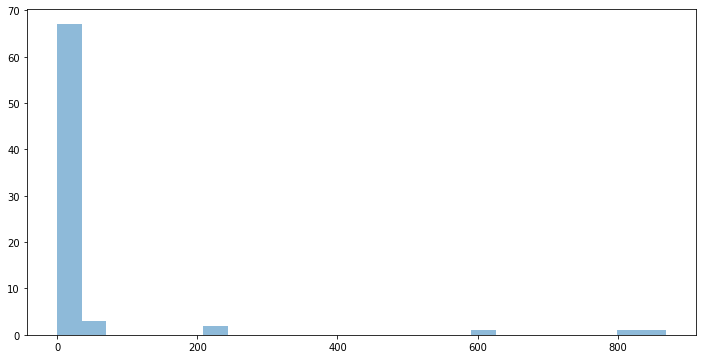

In [38]:
# re-plotting the histogram for ~ number of columns versus number of null values
missing_less_than_15 = listings.isnull().sum()
#plt.hist(missing_cols, bins = 25, alpha = 0.5)
#df1 = 
plt.hist(missing_less_than_15, bins = 25, alpha = 0.5)

In [39]:
print(missing_less_than_15)

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
price_per_person                                0
Length: 75, dtype: int64


In [40]:
# now the updated number of columns
len(listings.columns)

75

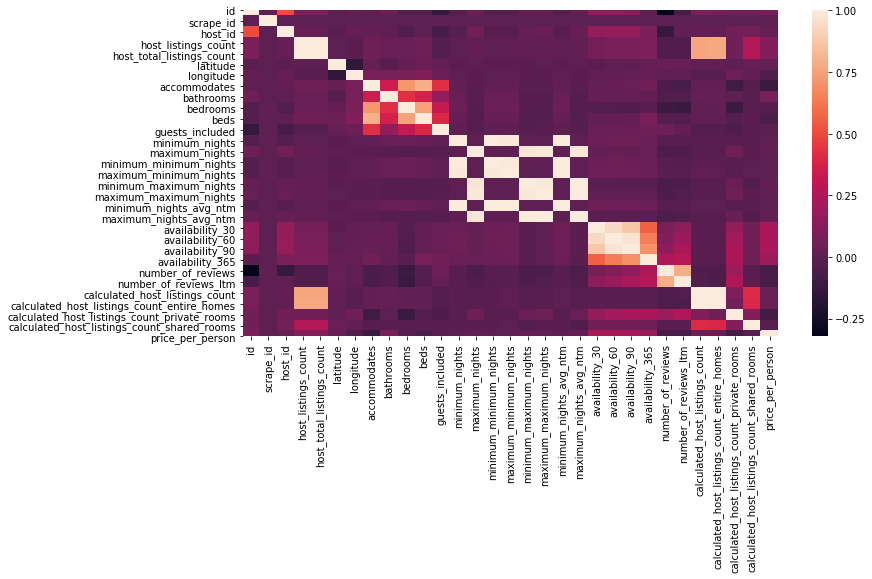

In [41]:
# correlation heatmap

corr_analysis = listings.corr()
sns.heatmap(corr_analysis, xticklabels=corr_analysis.columns.values, yticklabels=corr_analysis.columns.values)

In [42]:
missing_rows = listings.isnull().sum(axis=1)
missing_rows.value_counts().sort_index()

0     18033
1      1951
2       401
3        32
4         1
10       10
11        2
dtype: int64

In [43]:
# checking rows that have more than 2 values missing

rows_with_missing_few = missing_rows[missing_rows <= 2]
rows_with_missing_large = missing_rows[missing_rows > 2]
print(len(rows_with_missing_few))
print(len(rows_with_missing_large))

20385
45


In [44]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20430 entries, 0 to 20676
Data columns (total 75 columns):
id                                              20430 non-null int64
listing_url                                     20430 non-null object
scrape_id                                       20430 non-null int64
last_scraped                                    20430 non-null object
name                                            20430 non-null object
summary                                         19833 non-null object
description                                     20221 non-null object
experiences_offered                             20430 non-null object
picture_url                                     20430 non-null object
host_id                                         20430 non-null int64
host_url                                        20430 non-null object
host_name                                       20418 non-null object
host_since                                      20418 

In [45]:
# dropping rows with null values
rows_dropped = listings.dropna(axis=0)
rows_dropped.reset_index(inplace=True)
rows_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18033 entries, 0 to 18032
Data columns (total 76 columns):
index                                           18033 non-null int64
id                                              18033 non-null int64
listing_url                                     18033 non-null object
scrape_id                                       18033 non-null int64
last_scraped                                    18033 non-null object
name                                            18033 non-null object
summary                                         18033 non-null object
description                                     18033 non-null object
experiences_offered                             18033 non-null object
picture_url                                     18033 non-null object
host_id                                         18033 non-null int64
host_url                                        18033 non-null object
host_name                                       18033 n

In [46]:
# checking columns that are categorical

rows_dropped.select_dtypes(include='object').columns

# Dropping the columns which are useless

cols_to_drop = ['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location',
       'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'street',
       'neighbourhood', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'amenities', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'requires_license',
       'jurisdiction_names', 'is_business_travel_ready']

rows_dropped['require_guest_phone_verification'].value_counts().sort_index()

f    17791
t      242
Name: require_guest_phone_verification, dtype: int64

In [47]:
for column in cols_to_drop:
    del rows_dropped[column]
rows_dropped.select_dtypes(include='object').columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'price', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [48]:
# since t and f are strings, converting those to boolean using map function

vals_to_replace = {"t":1, "f":0}
replace = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
        'is_location_exact', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification']
for column in replace:
    rows_dropped[column] = rows_dropped[column].map(vals_to_replace)

In [49]:
# `price` is the target variable, so keeping aside that for now

final_df = rows_dropped.loc[:, rows_dropped.columns != 'price']
final_df.columns

Index(['index', 'id', 'scrape_id', 'host_id', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_roo

In [50]:
# converting categorical columns to numerical

final_df = pd.get_dummies(final_df)
print(list(final_df.columns))

['index', 'id', 'scrape_id', 'host_id', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'price_per_person', 'neighbourhood_cleansed_Bos en Lommer', 'neighbourhood_cleansed_Buitenveldert - Zuidas', 'neighbourhood_cleansed_Centrum-Oo

In [51]:
# cleaning the column names

final_df.columns = final_df.columns.str.replace(' ', '_')
final_df.columns = final_df.columns.str.replace('-', '_')
final_df.columns = final_df.columns.str.replace('__', '_')

In [52]:
# checking whether the categorical columns have been
# handled well or not

final_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [53]:
cols_to_drop2 = ['index', 'scrape_id', 'host_listings_count', 'host_total_listings_count', 
                 'host_has_profile_pic',
                 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                 'maximum_maximum_nights', 
                 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 
                 'calculated_host_listings_count']
for col2 in cols_to_drop2:
    del final_df[col2]

final_df.reset_index(inplace=True)

del final_df['index']

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18033 entries, 0 to 18032
Data columns (total 89 columns):
id                                                              18033 non-null int64
host_id                                                         18033 non-null int64
host_is_superhost                                               18033 non-null int64
host_identity_verified                                          18033 non-null int64
latitude                                                        18033 non-null float64
longitude                                                       18033 non-null float64
is_location_exact                                               18033 non-null int64
accommodates                                                    18033 non-null int64
bathrooms                                                       18033 non-null float64
bedrooms                                                        18033 non-null float64
beds                             

In [54]:
final_df.head()

,id,host_id,host_is_superhost,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_Real_Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,20168,59484,0,0,52.36509,4.89354,1,2,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
1,27886,97647,1,1,52.38673,4.89208,1,2,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
2,29051,124245,1,1,52.36773,4.89151,1,1,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0
3,38266,164204,0,0,52.37565,4.87969,1,2,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
4,42970,187580,1,0,52.36781,4.89001,1,2,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0


In [55]:
final_df.duplicated().sum()

0

In [56]:
final_df['price'] = rows_dropped['price']

In [57]:
final_df.price

0         $80.00
1        $150.00
2         $55.00
3        $145.00
4        $159.00
          ...   
18028    $160.00
18029    $375.00
18030     $47.00
18031    $200.00
18032     $90.00
Name: price, Length: 18033, dtype: object

In [58]:
# Removing $ sign and converting the price column to float from string

final_df['price'] = final_df['price'].str.replace(',', '')
final_df['price'] = final_df['price'].str.replace('$', '')
final_df['price'] = final_df['price'].astype(float)

In [59]:
final_df['price']

0         80.0
1        150.0
2         55.0
3        145.0
4        159.0
         ...  
18028    160.0
18029    375.0
18030     47.0
18031    200.0
18032     90.0
Name: price, Length: 18033, dtype: float64

# Model building for predicting prices

In [87]:
# Preparing labels and targets
X = final_df.loc[:, final_df.columns != 'price']
Y = final_df[['price']]

In [88]:
# further splitting the dataset into train and test to check the model metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [89]:
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_test.shape)

(14426, 89)
(14426, 1)
(3607, 1)
(3607, 89)


# Random Forest Regressor for predicting prices

In [63]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [64]:
# Different error metrics
Y_pred_rf = rf.predict(X_test)
print(mean_squared_error(Y_test, Y_pred_rf))
print(r2_score(Y_test,Y_pred_rf))

860.8471786534518
0.886545882461477


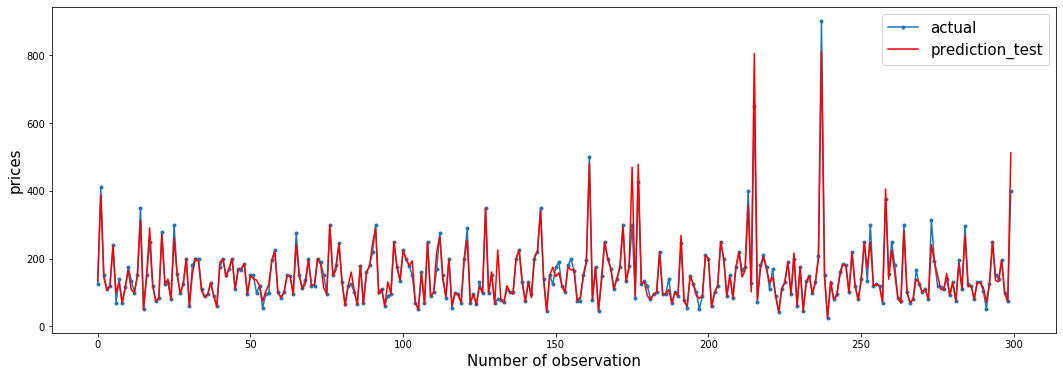

In [65]:
# Actual vs Predicted prices Plot
plt.rcParams["figure.figsize"] = (18, 6)
aa=[x for x in range(300)]
plt.plot(aa, Y_test[:300], marker='.', label="actual")
plt.plot(aa, Y_pred_rf[:300], 'r', label="prediction_test")
plt.ylabel('prices', size=15)
plt.xlabel('Number of observation', size=15)
plt.legend(fontsize=15)
plt.show()

# XGBoost Regressor for predicting prices

[04:20:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:172.623	validation_1-rmse:173.371
[1]	validation_0-rmse:171.015	validation_1-rmse:171.762
[2]	validation_0-rmse:169.423	validation_1-rmse:170.175
[3]	validation_0-rmse:167.846	validation_1-rmse:168.6
[4]	validation_0-rmse:166.289	validation_1-rmse:167.047
[5]	validation_0-rmse:164.749	validation_1-rmse:165.506
[6]	validation_0-rmse:163.224	validation_1-rmse:163.987
[7]	validation_0-rmse:161.714	validation_1-rmse:162.48
[8]	validation_0-rmse:160.221	validation_1-rmse:160.994
[9]	validation_0-rmse:158.743	validation_1-rmse:159.52
[10]	validation_0-rmse:157.283	validation_1-rmse:158.065
[11]	validation_0-rmse:155.837	validation_1-rmse:156.625
[12]	validation_0-rmse:154.409	validation_1-rmse:155.199
[13]	validation_0-rmse:152.992	validation_1-rmse:153.79
[14]	validation_0-rmse:151.593	validation_1-rmse:152.387
[15]	validation_0-rmse:150.199	validation_1-

[142]	validation_0-rmse:54.4172	validation_1-rmse:56.7519
[143]	validation_0-rmse:54.0712	validation_1-rmse:56.4108
[144]	validation_0-rmse:53.7287	validation_1-rmse:56.0997
[145]	validation_0-rmse:53.3981	validation_1-rmse:55.8004
[146]	validation_0-rmse:53.0661	validation_1-rmse:55.4841
[147]	validation_0-rmse:52.7406	validation_1-rmse:55.165
[148]	validation_0-rmse:52.4173	validation_1-rmse:54.8627
[149]	validation_0-rmse:52.0985	validation_1-rmse:54.565
[150]	validation_0-rmse:51.7794	validation_1-rmse:54.2695
[151]	validation_0-rmse:51.4617	validation_1-rmse:53.9712
[152]	validation_0-rmse:51.1518	validation_1-rmse:53.6814
[153]	validation_0-rmse:50.8434	validation_1-rmse:53.3829
[154]	validation_0-rmse:50.5413	validation_1-rmse:53.1009
[155]	validation_0-rmse:50.2376	validation_1-rmse:52.8187
[156]	validation_0-rmse:49.9413	validation_1-rmse:52.5334
[157]	validation_0-rmse:49.6533	validation_1-rmse:52.2724
[158]	validation_0-rmse:49.3658	validation_1-rmse:52.0064
[159]	validation

[284]	validation_0-rmse:30.1572	validation_1-rmse:35.2252
[285]	validation_0-rmse:30.0912	validation_1-rmse:35.1715
[286]	validation_0-rmse:30.0261	validation_1-rmse:35.1098
[287]	validation_0-rmse:29.9645	validation_1-rmse:35.066
[288]	validation_0-rmse:29.9013	validation_1-rmse:35.016
[289]	validation_0-rmse:29.8424	validation_1-rmse:34.9746
[290]	validation_0-rmse:29.7539	validation_1-rmse:34.9025
[291]	validation_0-rmse:29.6952	validation_1-rmse:34.8561
[292]	validation_0-rmse:29.6358	validation_1-rmse:34.8107
[293]	validation_0-rmse:29.5499	validation_1-rmse:34.7406
[294]	validation_0-rmse:29.4878	validation_1-rmse:34.6764
[295]	validation_0-rmse:29.4284	validation_1-rmse:34.6463
[296]	validation_0-rmse:29.3449	validation_1-rmse:34.5782
[297]	validation_0-rmse:29.286	validation_1-rmse:34.5226
[298]	validation_0-rmse:29.2042	validation_1-rmse:34.4564
[299]	validation_0-rmse:29.1503	validation_1-rmse:34.4151
[300]	validation_0-rmse:29.07	validation_1-rmse:34.3502
[301]	validation_0-

[426]	validation_0-rmse:24.4032	validation_1-rmse:30.7371
[427]	validation_0-rmse:24.3787	validation_1-rmse:30.72
[428]	validation_0-rmse:24.36	validation_1-rmse:30.701
[429]	validation_0-rmse:24.3395	validation_1-rmse:30.6868
[430]	validation_0-rmse:24.3234	validation_1-rmse:30.6581
[431]	validation_0-rmse:24.292	validation_1-rmse:30.624
[432]	validation_0-rmse:24.2758	validation_1-rmse:30.6068
[433]	validation_0-rmse:24.2547	validation_1-rmse:30.5924
[434]	validation_0-rmse:24.2336	validation_1-rmse:30.5763
[435]	validation_0-rmse:24.2171	validation_1-rmse:30.5604
[436]	validation_0-rmse:24.2015	validation_1-rmse:30.5327
[437]	validation_0-rmse:24.1871	validation_1-rmse:30.5232
[438]	validation_0-rmse:24.1698	validation_1-rmse:30.5161
[439]	validation_0-rmse:24.1399	validation_1-rmse:30.4833
[440]	validation_0-rmse:24.1202	validation_1-rmse:30.4657
[441]	validation_0-rmse:24.1002	validation_1-rmse:30.4521
[442]	validation_0-rmse:24.0806	validation_1-rmse:30.4289
[443]	validation_0-rm

[568]	validation_0-rmse:22.3803	validation_1-rmse:29.009
[569]	validation_0-rmse:22.3705	validation_1-rmse:29.0042
[570]	validation_0-rmse:22.364	validation_1-rmse:29.0018
[571]	validation_0-rmse:22.356	validation_1-rmse:28.9969
[572]	validation_0-rmse:22.3396	validation_1-rmse:28.9775
[573]	validation_0-rmse:22.3348	validation_1-rmse:28.9689
[574]	validation_0-rmse:22.3273	validation_1-rmse:28.9454
[575]	validation_0-rmse:22.3203	validation_1-rmse:28.9423
[576]	validation_0-rmse:22.3108	validation_1-rmse:28.9376
[577]	validation_0-rmse:22.3047	validation_1-rmse:28.9344
[578]	validation_0-rmse:22.2931	validation_1-rmse:28.9183
[579]	validation_0-rmse:22.2883	validation_1-rmse:28.9137
[580]	validation_0-rmse:22.2811	validation_1-rmse:28.904
[581]	validation_0-rmse:22.2749	validation_1-rmse:28.9021
[582]	validation_0-rmse:22.2627	validation_1-rmse:28.8932
[583]	validation_0-rmse:22.2532	validation_1-rmse:28.879
[584]	validation_0-rmse:22.2442	validation_1-rmse:28.8789
[585]	validation_0-

[710]	validation_0-rmse:21.4203	validation_1-rmse:28.1131
[711]	validation_0-rmse:21.4156	validation_1-rmse:28.1099
[712]	validation_0-rmse:21.4126	validation_1-rmse:28.1066
[713]	validation_0-rmse:21.4045	validation_1-rmse:28.1004
[714]	validation_0-rmse:21.3914	validation_1-rmse:28.0868
[715]	validation_0-rmse:21.3884	validation_1-rmse:28.0839
[716]	validation_0-rmse:21.3856	validation_1-rmse:28.0821
[717]	validation_0-rmse:21.3786	validation_1-rmse:28.0697
[718]	validation_0-rmse:21.3689	validation_1-rmse:28.0654
[719]	validation_0-rmse:21.3561	validation_1-rmse:28.0521
[720]	validation_0-rmse:21.3467	validation_1-rmse:28.0435
[721]	validation_0-rmse:21.3423	validation_1-rmse:28.0407
[722]	validation_0-rmse:21.3357	validation_1-rmse:28.0276
[723]	validation_0-rmse:21.332	validation_1-rmse:28.026
[724]	validation_0-rmse:21.3292	validation_1-rmse:28.0228
[725]	validation_0-rmse:21.3264	validation_1-rmse:28.0214
[726]	validation_0-rmse:21.3214	validation_1-rmse:28.0146
[727]	validation

[852]	validation_0-rmse:20.7346	validation_1-rmse:27.4141
[853]	validation_0-rmse:20.7322	validation_1-rmse:27.4132
[854]	validation_0-rmse:20.7298	validation_1-rmse:27.4064
[855]	validation_0-rmse:20.7273	validation_1-rmse:27.407
[856]	validation_0-rmse:20.7221	validation_1-rmse:27.4025
[857]	validation_0-rmse:20.7163	validation_1-rmse:27.406
[858]	validation_0-rmse:20.7131	validation_1-rmse:27.4041
[859]	validation_0-rmse:20.7098	validation_1-rmse:27.4011
[860]	validation_0-rmse:20.7039	validation_1-rmse:27.3932
[861]	validation_0-rmse:20.702	validation_1-rmse:27.392
[862]	validation_0-rmse:20.6969	validation_1-rmse:27.3876
[863]	validation_0-rmse:20.6946	validation_1-rmse:27.3856
[864]	validation_0-rmse:20.6877	validation_1-rmse:27.3807
[865]	validation_0-rmse:20.6854	validation_1-rmse:27.3775
[866]	validation_0-rmse:20.6833	validation_1-rmse:27.3771
[867]	validation_0-rmse:20.6796	validation_1-rmse:27.3752
[868]	validation_0-rmse:20.677	validation_1-rmse:27.3736
[869]	validation_0-

[994]	validation_0-rmse:20.2762	validation_1-rmse:27.0298
[995]	validation_0-rmse:20.2732	validation_1-rmse:27.0294
[996]	validation_0-rmse:20.2717	validation_1-rmse:27.0286
[997]	validation_0-rmse:20.2687	validation_1-rmse:27.0245
[998]	validation_0-rmse:20.267	validation_1-rmse:27.0228
[999]	validation_0-rmse:20.2654	validation_1-rmse:27.0218
[1000]	validation_0-rmse:20.2644	validation_1-rmse:27.0211
[1001]	validation_0-rmse:20.2628	validation_1-rmse:27.0162
[1002]	validation_0-rmse:20.2578	validation_1-rmse:27.0103
[1003]	validation_0-rmse:20.2559	validation_1-rmse:27.0098
[1004]	validation_0-rmse:20.2549	validation_1-rmse:27.0095
[1005]	validation_0-rmse:20.2504	validation_1-rmse:27.0044
[1006]	validation_0-rmse:20.2487	validation_1-rmse:26.9996
[1007]	validation_0-rmse:20.2435	validation_1-rmse:26.9934
[1008]	validation_0-rmse:20.2391	validation_1-rmse:26.9963
[1009]	validation_0-rmse:20.2375	validation_1-rmse:26.9916
[1010]	validation_0-rmse:20.2356	validation_1-rmse:26.9916
[101

[1134]	validation_0-rmse:19.9106	validation_1-rmse:26.7337
[1135]	validation_0-rmse:19.9083	validation_1-rmse:26.7316
[1136]	validation_0-rmse:19.9064	validation_1-rmse:26.7298
[1137]	validation_0-rmse:19.9036	validation_1-rmse:26.7274
[1138]	validation_0-rmse:19.9014	validation_1-rmse:26.7246
[1139]	validation_0-rmse:19.8996	validation_1-rmse:26.7244
[1140]	validation_0-rmse:19.8981	validation_1-rmse:26.7244
[1141]	validation_0-rmse:19.8958	validation_1-rmse:26.7249
[1142]	validation_0-rmse:19.8938	validation_1-rmse:26.7247
[1143]	validation_0-rmse:19.8916	validation_1-rmse:26.7233
[1144]	validation_0-rmse:19.8873	validation_1-rmse:26.7192
[1145]	validation_0-rmse:19.8841	validation_1-rmse:26.715
[1146]	validation_0-rmse:19.8825	validation_1-rmse:26.7144
[1147]	validation_0-rmse:19.8797	validation_1-rmse:26.712
[1148]	validation_0-rmse:19.8781	validation_1-rmse:26.7103
[1149]	validation_0-rmse:19.8748	validation_1-rmse:26.713
[1150]	validation_0-rmse:19.8726	validation_1-rmse:26.7103


[1274]	validation_0-rmse:19.5901	validation_1-rmse:26.5124
[1275]	validation_0-rmse:19.5886	validation_1-rmse:26.5126
[1276]	validation_0-rmse:19.5866	validation_1-rmse:26.5112
[1277]	validation_0-rmse:19.5842	validation_1-rmse:26.5116
[1278]	validation_0-rmse:19.5815	validation_1-rmse:26.5058
[1279]	validation_0-rmse:19.5798	validation_1-rmse:26.5058
[1280]	validation_0-rmse:19.579	validation_1-rmse:26.5049
[1281]	validation_0-rmse:19.576	validation_1-rmse:26.504
[1282]	validation_0-rmse:19.5749	validation_1-rmse:26.5025
[1283]	validation_0-rmse:19.5724	validation_1-rmse:26.5047
[1284]	validation_0-rmse:19.5707	validation_1-rmse:26.5031
[1285]	validation_0-rmse:19.5694	validation_1-rmse:26.5016
[1286]	validation_0-rmse:19.5686	validation_1-rmse:26.501
[1287]	validation_0-rmse:19.5658	validation_1-rmse:26.5008
[1288]	validation_0-rmse:19.5635	validation_1-rmse:26.5013
[1289]	validation_0-rmse:19.5599	validation_1-rmse:26.497
[1290]	validation_0-rmse:19.5572	validation_1-rmse:26.4912
[1

[1414]	validation_0-rmse:19.333	validation_1-rmse:26.3576
[1415]	validation_0-rmse:19.3304	validation_1-rmse:26.3535
[1416]	validation_0-rmse:19.3287	validation_1-rmse:26.3524
[1417]	validation_0-rmse:19.3278	validation_1-rmse:26.3522
[1418]	validation_0-rmse:19.3268	validation_1-rmse:26.351
[1419]	validation_0-rmse:19.3248	validation_1-rmse:26.3529
[1420]	validation_0-rmse:19.3221	validation_1-rmse:26.3496
[1421]	validation_0-rmse:19.3208	validation_1-rmse:26.3497
[1422]	validation_0-rmse:19.3204	validation_1-rmse:26.3493
[1423]	validation_0-rmse:19.3199	validation_1-rmse:26.349
[1424]	validation_0-rmse:19.3191	validation_1-rmse:26.3483
[1425]	validation_0-rmse:19.3171	validation_1-rmse:26.3479
[1426]	validation_0-rmse:19.3153	validation_1-rmse:26.3474
[1427]	validation_0-rmse:19.3142	validation_1-rmse:26.3476
[1428]	validation_0-rmse:19.3127	validation_1-rmse:26.3466
[1429]	validation_0-rmse:19.3116	validation_1-rmse:26.3456
[1430]	validation_0-rmse:19.3108	validation_1-rmse:26.3433


[1554]	validation_0-rmse:19.1423	validation_1-rmse:26.224
[1555]	validation_0-rmse:19.1408	validation_1-rmse:26.2221
[1556]	validation_0-rmse:19.1399	validation_1-rmse:26.2203
[1557]	validation_0-rmse:19.1396	validation_1-rmse:26.2201
[1558]	validation_0-rmse:19.1379	validation_1-rmse:26.2177
[1559]	validation_0-rmse:19.1367	validation_1-rmse:26.217
[1560]	validation_0-rmse:19.1361	validation_1-rmse:26.2159
[1561]	validation_0-rmse:19.1349	validation_1-rmse:26.2145
[1562]	validation_0-rmse:19.1332	validation_1-rmse:26.2147
[1563]	validation_0-rmse:19.1327	validation_1-rmse:26.2129
[1564]	validation_0-rmse:19.1321	validation_1-rmse:26.2127
[1565]	validation_0-rmse:19.1309	validation_1-rmse:26.2129
[1566]	validation_0-rmse:19.1302	validation_1-rmse:26.2124
[1567]	validation_0-rmse:19.1286	validation_1-rmse:26.2137
[1568]	validation_0-rmse:19.1277	validation_1-rmse:26.2135
[1569]	validation_0-rmse:19.1269	validation_1-rmse:26.2153
[1570]	validation_0-rmse:19.1247	validation_1-rmse:26.2139

[1694]	validation_0-rmse:18.9926	validation_1-rmse:26.1272
[1695]	validation_0-rmse:18.992	validation_1-rmse:26.1268
[1696]	validation_0-rmse:18.9894	validation_1-rmse:26.124
[1697]	validation_0-rmse:18.988	validation_1-rmse:26.1217
[1698]	validation_0-rmse:18.9874	validation_1-rmse:26.1216
[1699]	validation_0-rmse:18.9869	validation_1-rmse:26.121
[1700]	validation_0-rmse:18.9855	validation_1-rmse:26.1214
[1701]	validation_0-rmse:18.9844	validation_1-rmse:26.1214
[1702]	validation_0-rmse:18.9836	validation_1-rmse:26.1215
[1703]	validation_0-rmse:18.9828	validation_1-rmse:26.1213
[1704]	validation_0-rmse:18.9823	validation_1-rmse:26.121
[1705]	validation_0-rmse:18.9817	validation_1-rmse:26.1207
[1706]	validation_0-rmse:18.9801	validation_1-rmse:26.1179
[1707]	validation_0-rmse:18.9795	validation_1-rmse:26.1174
[1708]	validation_0-rmse:18.9779	validation_1-rmse:26.1188
[1709]	validation_0-rmse:18.9772	validation_1-rmse:26.116
[1710]	validation_0-rmse:18.9768	validation_1-rmse:26.1161
[17

[1834]	validation_0-rmse:18.8566	validation_1-rmse:26.04
[1835]	validation_0-rmse:18.8554	validation_1-rmse:26.0382
[1836]	validation_0-rmse:18.8552	validation_1-rmse:26.038
[1837]	validation_0-rmse:18.8545	validation_1-rmse:26.0375
[1838]	validation_0-rmse:18.8522	validation_1-rmse:26.0367
[1839]	validation_0-rmse:18.8503	validation_1-rmse:26.034
[1840]	validation_0-rmse:18.8493	validation_1-rmse:26.0327
[1841]	validation_0-rmse:18.8488	validation_1-rmse:26.0323
[1842]	validation_0-rmse:18.8483	validation_1-rmse:26.0322
[1843]	validation_0-rmse:18.8477	validation_1-rmse:26.0297
[1844]	validation_0-rmse:18.8472	validation_1-rmse:26.0295
[1845]	validation_0-rmse:18.8461	validation_1-rmse:26.0291
[1846]	validation_0-rmse:18.845	validation_1-rmse:26.0283
[1847]	validation_0-rmse:18.8441	validation_1-rmse:26.028
[1848]	validation_0-rmse:18.843	validation_1-rmse:26.026
[1849]	validation_0-rmse:18.8422	validation_1-rmse:26.0259
[1850]	validation_0-rmse:18.8415	validation_1-rmse:26.0259
[1851

[1974]	validation_0-rmse:18.7355	validation_1-rmse:25.9921
[1975]	validation_0-rmse:18.7351	validation_1-rmse:25.9918
[1976]	validation_0-rmse:18.7339	validation_1-rmse:25.9906
[1977]	validation_0-rmse:18.7333	validation_1-rmse:25.9905
[1978]	validation_0-rmse:18.7324	validation_1-rmse:25.9906
[1979]	validation_0-rmse:18.7309	validation_1-rmse:25.9906
[1980]	validation_0-rmse:18.7303	validation_1-rmse:25.9882
[1981]	validation_0-rmse:18.7295	validation_1-rmse:25.9881
[1982]	validation_0-rmse:18.7288	validation_1-rmse:25.9882
[1983]	validation_0-rmse:18.7281	validation_1-rmse:25.988
[1984]	validation_0-rmse:18.7277	validation_1-rmse:25.9879
[1985]	validation_0-rmse:18.7265	validation_1-rmse:25.987
[1986]	validation_0-rmse:18.7261	validation_1-rmse:25.9884
[1987]	validation_0-rmse:18.7252	validation_1-rmse:25.9882
[1988]	validation_0-rmse:18.7249	validation_1-rmse:25.988
[1989]	validation_0-rmse:18.7245	validation_1-rmse:25.9883
[1990]	validation_0-rmse:18.7238	validation_1-rmse:25.9882


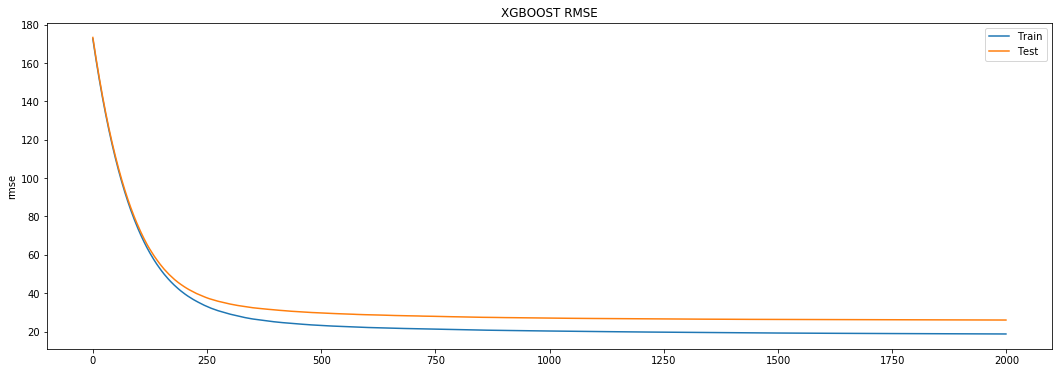

In [90]:
# fit model no training data
model = xgb.XGBRegressor(learning_rate=0.01, n_estimators= 2000)
eval_set = [(X_train, Y_train), (X_test, Y_test)]
model.fit(X_train, Y_train, eval_metric='rmse', eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBOOST RMSE')
plt.show()

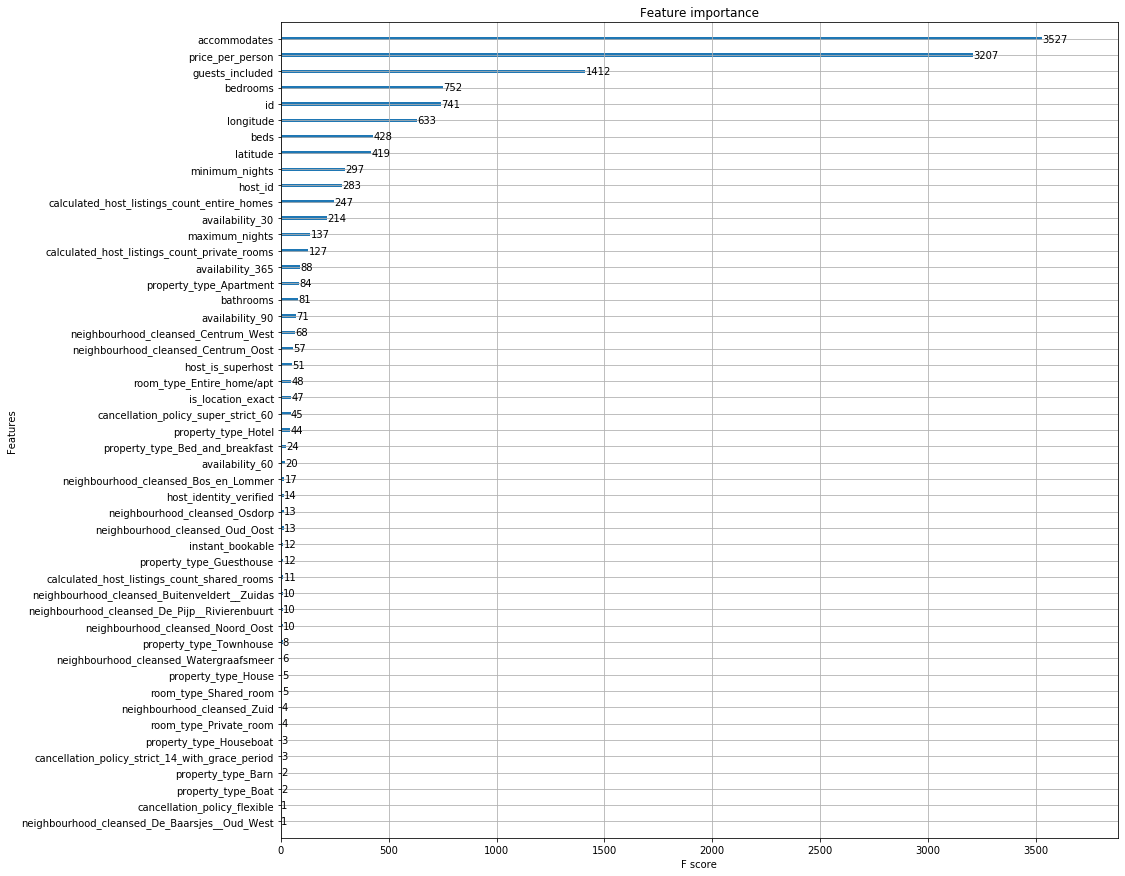

In [91]:
# feature importance plot
plt.rcParams["figure.figsize"] = (15, 15)
plot_importance(model)

# From above features that highly affect room prices are

So, main factors affecting number of accomodates, prices are price person person, location of the apartment, number of guests,beds and bedrooms, minimum nights.

In [92]:
# Different error metrics
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test,y_pred))

675.4180882373021
0.9109842431145754


# From above two models comparing the metrics XGBOOST perform better than Random Forest

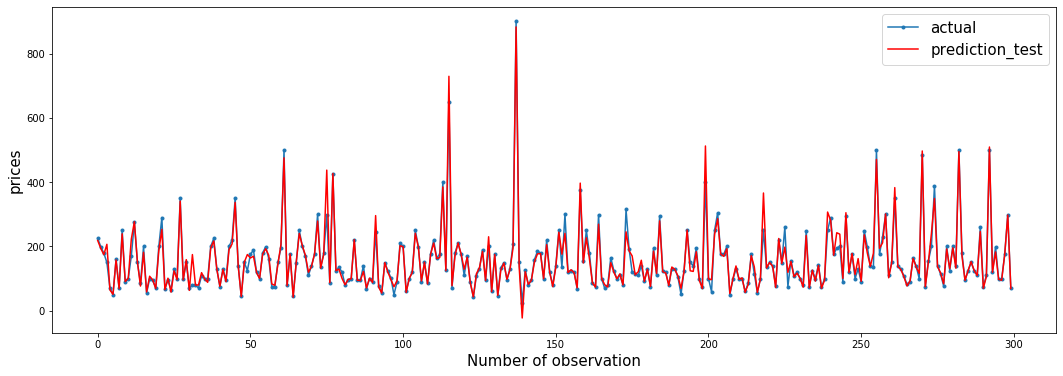

In [93]:
# Actual vs Predicted prices Plot
plt.rcParams["figure.figsize"] = (18, 6)
aa=[x for x in range(300)]
plt.plot(aa, Y_test[100:400], marker='.', label="actual")
plt.plot(aa, y_pred[100:400], 'r', label="prediction_test")
plt.ylabel('prices', size=15)
plt.xlabel('Number of observation', size=15)
plt.legend(fontsize=15)
plt.show()

In [94]:
Actual_prices = pd.DataFrame(Y_test)
Actual_prices['predicted_prices'] = y_pred
Actual_prices

,price,predicted_prices
13142,125.0,136.181580
5207,410.0,378.938477
15814,150.0,150.540985
13313,110.0,108.814781
14426,120.0,115.912636
...,...,...
3684,110.0,107.468124
8141,130.0,127.100182
5245,90.0,93.150047
11446,200.0,203.500076


# HyperOpt for HyperParameters Tuning

def objective(space):

    reg = xgb.XGBRegressor(n_estimators = space['n_estimators'],
                           max_depth = space['max_depth'],
                           min_child_weight = space['min_child_weight'],
                           subsample = space['subsample'],
                           learning_rate = space['learning_rate'],
                           gamma = space['gamma'],
                           colsample_bytree = space['colsample_bytree'],
                           objective='reg:linear'
                           )

    eval_set  = [( X_train, Y_train), (X_test, Y_test)]

    reg.fit(X_train,
            Y_train,
            eval_set=eval_set,
            eval_metric = 'rmse')

    Y_pred = reg.predict(X_test)
#   mse = mean_squared_error
    mse = mean_squared_error(Y_test, Y_pred)

#    print "SCORE:", rmse
    return{'loss':mse, 'status': STATUS_OK }


space ={
        'max_depth': hp.choice('max_depth', np.arange(1, 15, dtype=int)),
        'min_child_weight': hp.quniform ('min_child', 1, 20, 1),
        'subsample': hp.uniform ('subsample', 0.5, 1),
        'n_estimators' : hp.choice('n_estimators', np.arange(100,1000,100, dtype=int)),
        'learning_rate' : hp.quniform('learning_rate', 0.01, 0.25, 0.025),
        'gamma' : hp.quniform('gamma', 0.1, 1, 0.05),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05)
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10, 
            trials=trials)

print(best)